#Implementation of Ablang from Deane lab.
Analysis of antibody heavy chains using Ablang embeddings, dimension reduction techniques, and kmeans to replicate findings from Ablang paper and further explore embedding space.

In [ ]:
#@title Mount drive and load libraries
%%capture
!pip3 install torch transformers scikit-learn
!python -m pip install ankh
!pip install umap-learn[plot]

import os, warnings, re
from google.colab import drive
import torch, umap
from sklearn.manifold import TSNE, Isomap, SpectralEmbedding
from sklearn.preprocessing import LabelEncoder
import seaborn as sns, matplotlib.pyplot as plt
import pandas as pd, numpy as np
from scipy.sparse import SparseEfficiencyWarning

drive.mount('/content/drive/')
path = '/content/drive/MyDrive/msc-project-mbalmf01/msc-project-source-code-files-22-23-mbalmf01/notebooks'
os.chdir(path)

from plm_manipulation import start_ablang, process_seqs, batch_embed, redux_fit
from clustering import kmeans_redux

In [2]:
#@title Load in model and tokenizer from Ablang Heavy model
model, tokenizer = start_ablang('AbLang_heavy')

In [3]:
#@title Read in source antibody dataframe and the Ablang heavy chain embeddings
df = pd.read_csv('/content/drive/MyDrive/msc-project-mbalmf01/all_paired/230716_human_paired_seqs.csv', dtype={'Run':np.str_}, index_col=0)
tensor_df = pd.read_csv('/content/drive/MyDrive/msc-project-mbalmf01/all_paired/230809_ablang_tensor_10000.csv', index_col=0)

In [ ]:
sequences = df.iloc[10000:50000]
tensor_df = batch_embed(df=sequences, prot_col='sequence_alignment_aa_heavy', seq_id='seq_id', batch_size=100, model=model, tokenizer=tokenizer)
tensor_df.to_csv('/content/drive/MyDrive/msc-project-mbalmf01/all_paired/230810_ablang_tensor_40000.csv')

In [ ]:
sequences.columns

Index(['Unnamed: 1', 'sequence_id_heavy', 'ANARCI_status_heavy',
       'sequence_heavy', 'sequence_alignment_aa_heavy', 'v_call_heavy',
       'd_call_heavy', 'j_call_heavy', 'sequence_id_light',
       'ANARCI_status_light', 'sequence_light', 'v_call_light', 'j_call_light',
       'sequence_alignment_aa_light', 'Run', 'seq_id', 'scfv'],
      dtype='object')

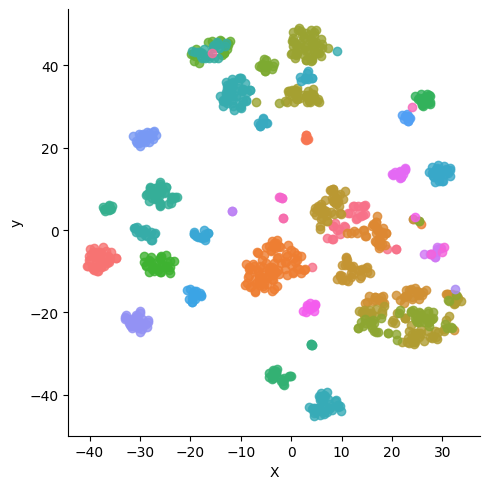

In [ ]:
#@title Feature space reduction with TSNE and clustering with kmeans
new_df = redux_fit(model=TSNE, components=2, randstate=42, data=tensor_df.iloc[:, :-1])

sub = df.iloc[0:1000]
new_df['cluster'] = sub['v_call_heavy'].apply(lambda x: x.split('*')[0])

sns.lmplot(x='X', y='y', data=new_df, hue='cluster',  fit_reg=False, legend=False)
scatter_kws = {'s': 10}

plt.show()

In [ ]:
# Convert categorical labels to numeric labels
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(df.iloc[0:10000]['v_call_heavy'])
n_clusters = [32,34,36,38,40,42,44]
cluster_purities = kmeans_redux(n_clusters=n_clusters, model=TSNE, components=2, randstate=42, data=tensor_df.iloc[:,:-1])
print(cluster_purities)

[0.7059, 0.7018, 0.7195, 0.7619, 0.7108, 0.7068, 0.7166]


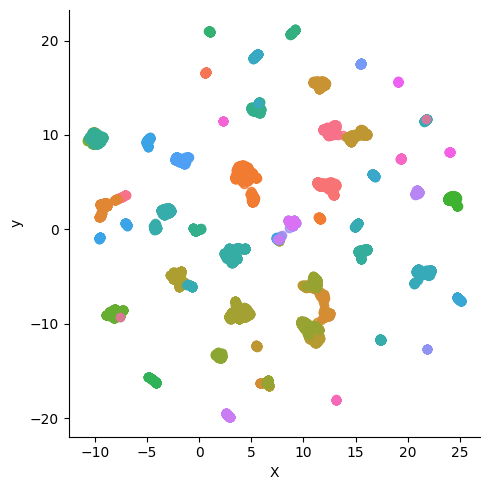

In [4]:
#@title Feature space reduction with UMAP and clustering with kmeans
new_df = redux_fit(model=umap.UMAP, components=2, randstate=42, data=tensor_df.iloc[:,:-1])

sub = df.iloc[0:10000]
new_df['cluster'] = sub['v_call_heavy'].apply(lambda x: x.split('*')[0])

sns.lmplot(x='X', y='y', data=new_df, hue='cluster',  fit_reg=False, legend=False)
scatter_kws = {'s': 10}

plt.show()

In [ ]:
n_clusters = [32,34,36,38,40,42,44]
cluster_purities = kmeans_redux(n_clusters=n_clusters, model=umap.UMAP, components=2, randstate=42, data=tensor_df.iloc[:,:-1])
print(cluster_purities)

[0.7189, 0.7236, 0.7172, 0.7226, 0.7521, 0.7527, 0.7609]


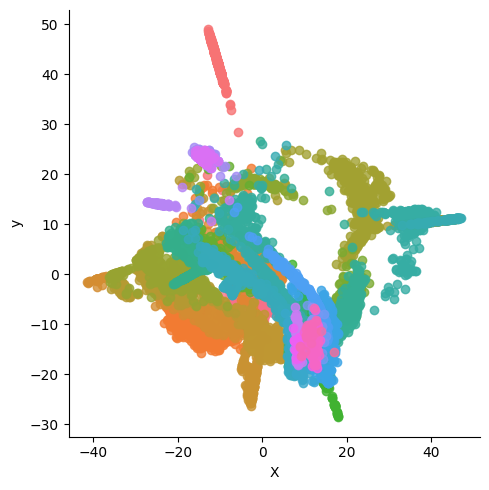

In [ ]:
#@title Feature space reduction with Isomap and clustering with kmeans
warnings.filterwarnings("ignore", category=SparseEfficiencyWarning)

X = tensor_df.iloc[:, :-1]

new_df = redux_fit(model=Isomap, components=2, randstate=42, data=X)
sub = df.iloc[0:10000]
new_df['cluster'] = sub['v_call_heavy'].apply(lambda x: x.split('*')[0])

sns.lmplot(x='X', y='y', data=new_df, hue='cluster',  fit_reg=False, legend=False)
scatter_kws = {'s': 10}

plt.show()

In [ ]:
warnings.filterwarnings("ignore", category=SparseEfficiencyWarning)

n_clusters = [32,34,36,38,40,42,44]
cluster_purities = kmeans_redux(n_clusters=n_clusters, model=Isomap, components=2, randstate=42, data=tensor_df.iloc[:,:-1])
print(cluster_purities)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 19 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)


[0.4459, 0.44, 0.4441, 0.4327, 0.4168, 0.4161, 0.4262]


In [8]:
#@title Increasing number of components to 4
warnings.filterwarnings("ignore", category=SparseEfficiencyWarning)
n_clusters = [32,34,36,38,40,42,44]
cluster_purities = kmeans_redux(n_clusters=n_clusters, model=Isomap, components=4, randstate=42, data=tensor_df.iloc[:,:-1])
print(cluster_purities)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 19 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)


[0.6161, 0.61, 0.626, 0.6191, 0.5845, 0.5785, 0.5379]
